<center>
    
    Filters
    
    Author: Daniel Coble
</center>

In the challenge problem of the Fourier transform notebook, you used a Fourier transform to remove a high-frequency component of the signal. There's a more efficient way to do this other than taking an FFT and IFFT, using filters. Filters can do a lot: there are smoothing filters, low-pass filters, high-pass filters, band-pass filters. Basically anything which is linear (in the time or frequency domain), can be done with a filter. Still, the main function of a filter is to remove or isolate frequencies of a signal.

There's a lot of theory that goes into filter construction, so all I can hope to do here is show a few examples without explaining the details of what's going on. This notebook will focus on low-pass filters, since they're very commonly used and after you understand low-pass filters, high-pass and band-pass filters act in basically the same way.

Scipy has an implementation of filters. We'll use the scipy implementation of the Butterworth filter, which is in some senses the best filter as it has a maximally flat frequency response in the pass band. The `signal.butter` function has the following arguments:

`N`: The order of the filter. Basically it's complexity. A larger `N` will produce a more accurate filter.

`Wn`: The critical frequency.

`btype`: The type of filter. One of 'lowpass', 'highpass', 'bandpass', or 'bandstop'.

`analog`: Whether an analog or digital filter will be returned. We will always use analog=False (the default).

`output`: How the returned filter is represented. One of 'ba', 'zpk', or 'sos'. It's technical, but it's recommended to use 'sos', but we have to use 'ba' to get a frequency response plot.

`fs`: The sampling frequency of the data.

Resources: The Art of Doing Science and Engineering (Richard Hamming), chapters 14-17.

Let's first use the Butterworth filter to do the Fourier transform challenge problem. To understand the Butterworth filter, we'll do a plot its frequency response.

<IPython.core.display.Javascript object>


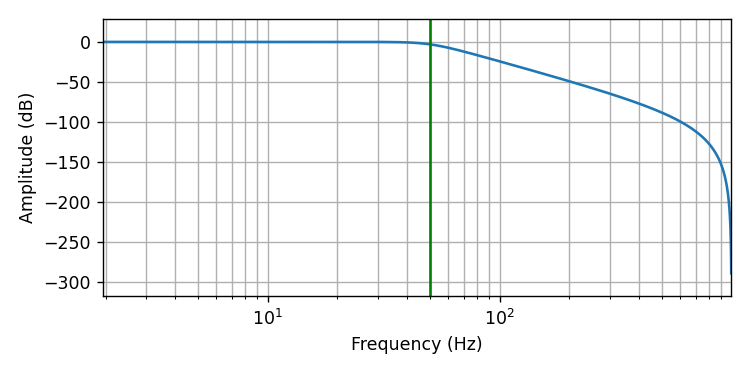

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib notebook
# generate the data
t = np.linspace(0, 1, num=2000) # say the signal occurs over 1 sec.
x = np.sin(2*np.pi*(20*t)) + .2*np.sin(2*np.pi*(200*t)) + (.05*np.random.rand(2000)-.025)

Wn = 50
N = 4
# frequency response
b, a = signal.butter(N, Wn, btype='lowpass', analog=False, output='ba', fs=2000)
# b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqz(b, a, fs=2000)
plt.figure(figsize=(6,3))
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(Wn, color='green') # cutoff frequency
plt.tight_layout()

The frequency response plot shows the scaling which will happen to each frequency component of the signal as a result of applying the filter. It's plotted in log-scale, so 0 dB means that the frequency passes through unchanged, -10 dB means that the frequency is reduced by a factor of 10, and so on. Now let's run the filter.

<IPython.core.display.Javascript object>


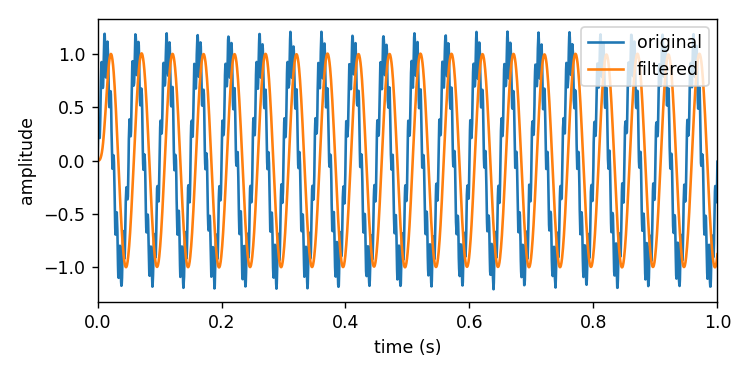

In [2]:
sos = signal.butter(N, Wn, btype='lowpass', analog=False, output='sos', fs=2000)

x_filtered = signal.sosfilt(sos, x)
# plot portion of signal and filtered signal.

plt.figure(figsize=(6,3))
plt.plot(t, x, label='original')
plt.plot(t, x_filtered, label='filtered')
plt.xlim((0, 1))
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.legend(loc=1)
plt.tight_layout()

So the filter preserved the amplitude of the 20 Hz component, but it imparted a phase shift onto it. That's not ideal, but there's a simple solution: just running the filter backwards to undo the phase shift. The scipy function `sosfiltfilt` does exactly this. That also has the effect of performing the frequency response twice.

<IPython.core.display.Javascript object>


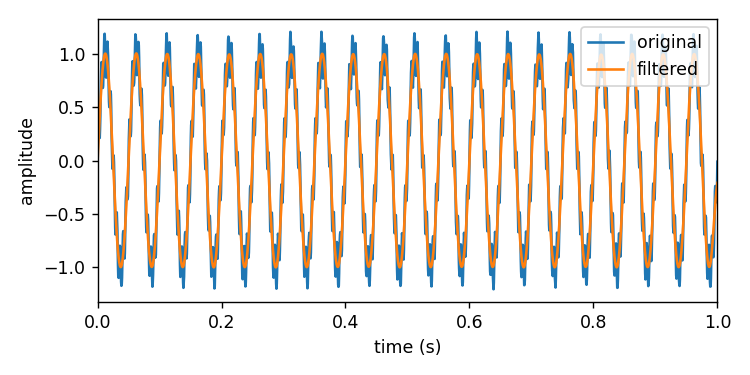

In [3]:
x_filtfiltered = signal.sosfiltfilt(sos, x)
# plot portion of signal and filtered signal.

plt.figure(figsize=(6,3))
plt.plot(t, x, label='original')
plt.plot(t, x_filtfiltered, label='filtered')
plt.xlim((0, 1))
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.legend(loc=1)
plt.tight_layout()

**Challenge problem**

In the spectrogram you created for the last problem, you should have been able to isolate the first and second mode frequencies of the beam. Use a lowpass filter to remove all frequencies above the first mode.

In [4]:
data = np.load('./data/vibration_measurement.npy')
t = data[:,0]
x = data[:,1]